In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prepare

import warnings
warnings.filterwarnings("ignore")

In [6]:
# getting the data

df = pd.read_csv('sales.csv', index_col = 0)

In [7]:
# taking a look at our data

df

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
912995,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20
912996,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20
912997,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20
912998,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20


**Looks like our data needs some preparation.**

In [8]:
# using the prep_sales_df function in prepare module to prepare our data

df = prepare.prep_sales_df(df)

In [10]:
df.head(20)

,quantity,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,month,day,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,294.00
2013-01-01 00:00:00+00:00,41.0,217295,8503 NW Military Hwy,San Antonio,10,TX,78231,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,344.40
2013-01-01 00:00:00+00:00,23.0,830831,1015 S WW White Rd,San Antonio,6,TX,78220,Mama Marys,46,Pizza Sauce,4.65,January,Tuesday,106.95
2013-01-01 00:00:00+00:00,37.0,219121,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,January,Tuesday,239.39
2013-01-01 00:00:00+00:00,51.0,220947,9255 FM 471 West,San Antonio,2,TX,78251,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,January,Tuesday,329.97


**Let's split our data**

In [12]:
# lets check the range of the data first

df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00+0000', tz='GMT'),
 Timestamp('2013-01-01 00:00:00+0000', tz='GMT'))

- Our data consists of datapoints spread over 5 year.
- Split first four years into train and the last year into test

In [21]:
# all the datapoints upto the end of 2016 are included in train split

train = df[:'2016']

 
# all datapoints of 2017 are included in test split

test = df['2017']

In [27]:
train.shape, test.shape

((730500, 14), (182500, 14))

In [34]:
# separating our y variable

y = train[['sales_total']]

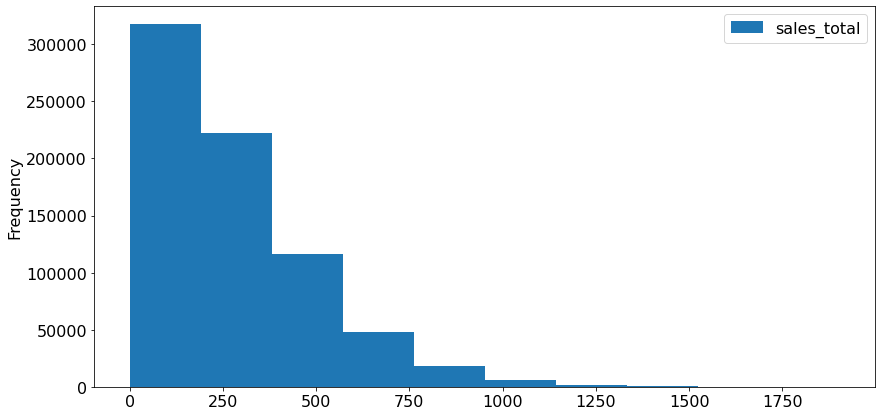

In [48]:
y.plot.hist()
plt.show()

- lets check how our average daily sales have done over the years

In [44]:
# lets set our default runtime configurations
plt.rc('figure', figsize = (14,7))
plt.rc('font', size=16)

Text(0, 0.5, 'dollar_value')

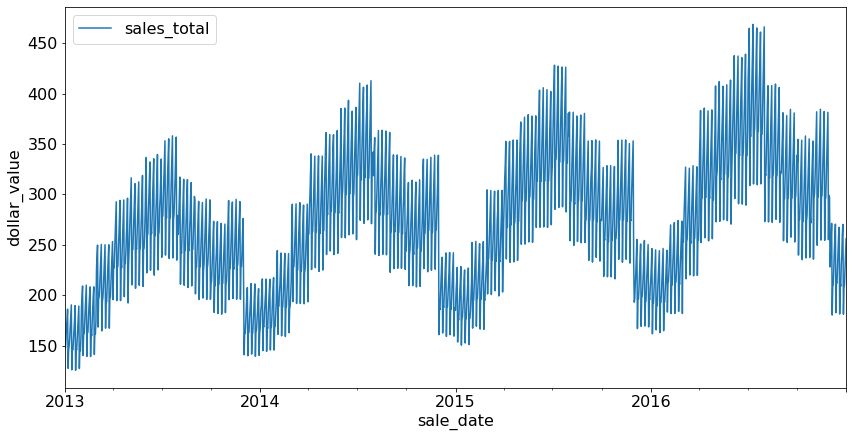

In [46]:


y.resample('D').mean().plot()
plt.ylabel('dollar_value')

- lets take a look at the average sale per month over the years

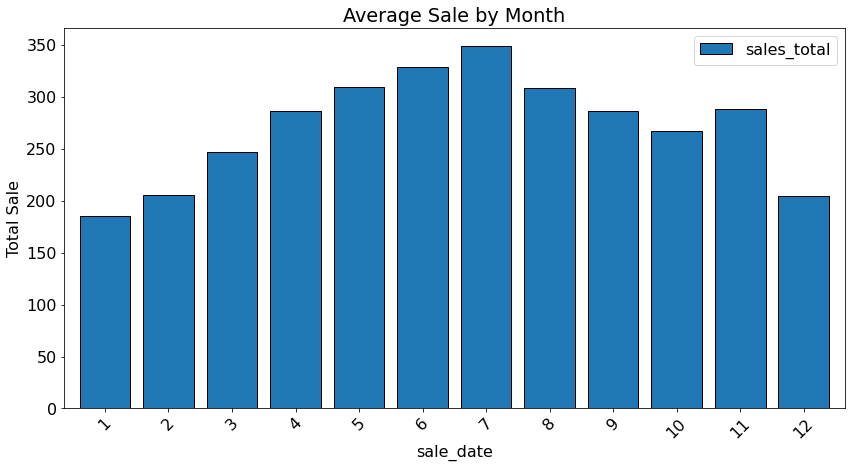

In [56]:
y.groupby(y.index.month).mean().plot.bar(width = 0.8, ec = 'black')
plt.xticks(rotation = 45)
plt.title("Average Sale by Month")
plt.ylabel('Total Sale')
plt.show()


- lets take a look at the average sales made during the different days of the week over the years

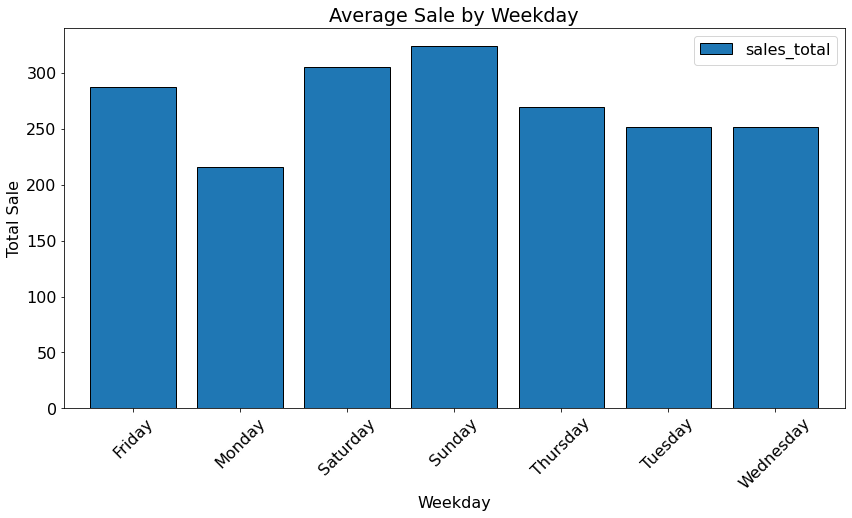

In [59]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width = .8, ec = 'black')
plt.xticks(rotation = 45)
ax.set(title = 'Average Sale by Weekday', xlabel = 'Weekday', ylabel = 'Total Sale')
plt.show()

(50.0, 400.0)

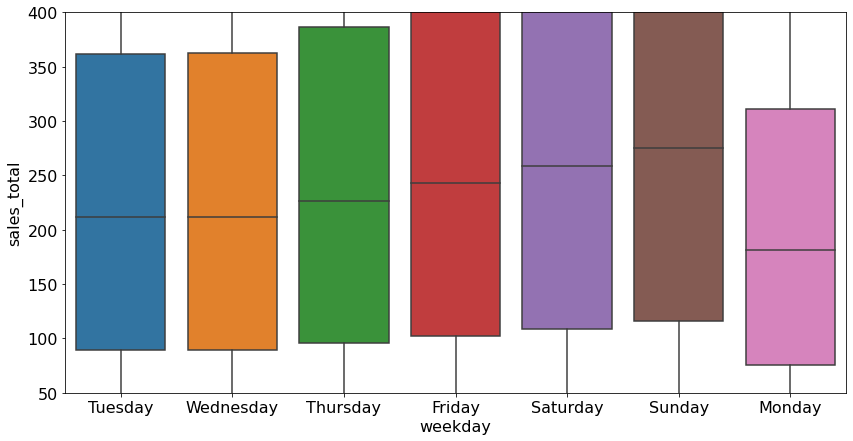

In [71]:
(
    y
    .assign(weekday=lambda df: df.index.day_name())
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)
plt.ylim(50,400)

<AxesSubplot:xlabel='sale_date'>

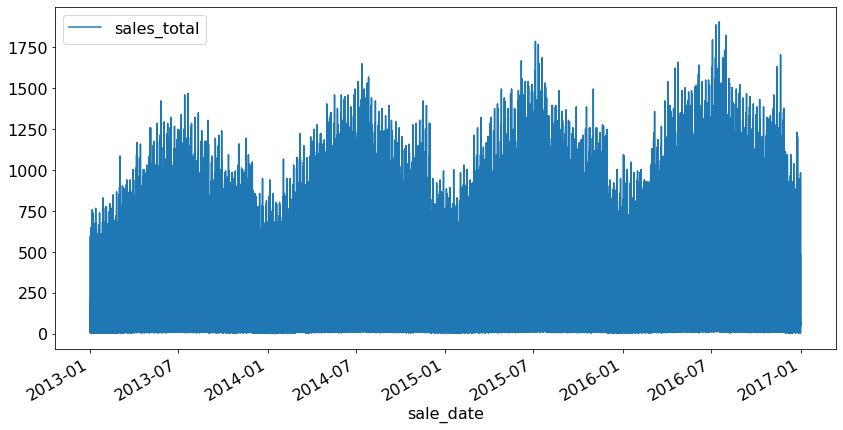

In [74]:
# lets vizualize the target over time
y.plot()

<AxesSubplot:xlabel='sale_date'>

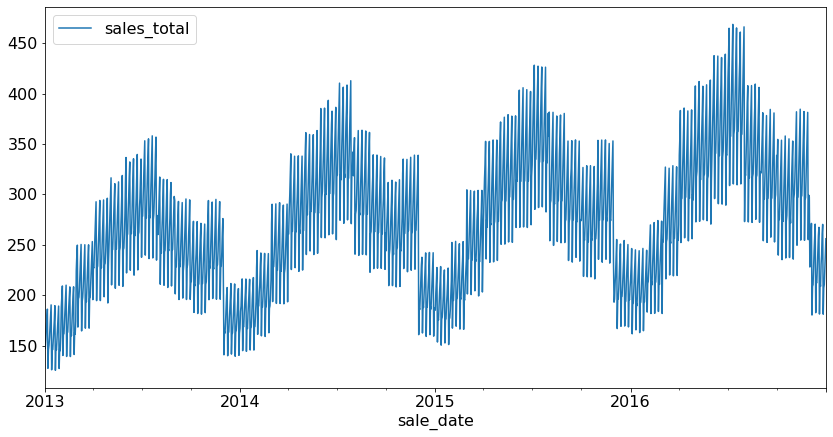

In [77]:
# vizualizing the daily mean

y.resample('D').mean().plot()

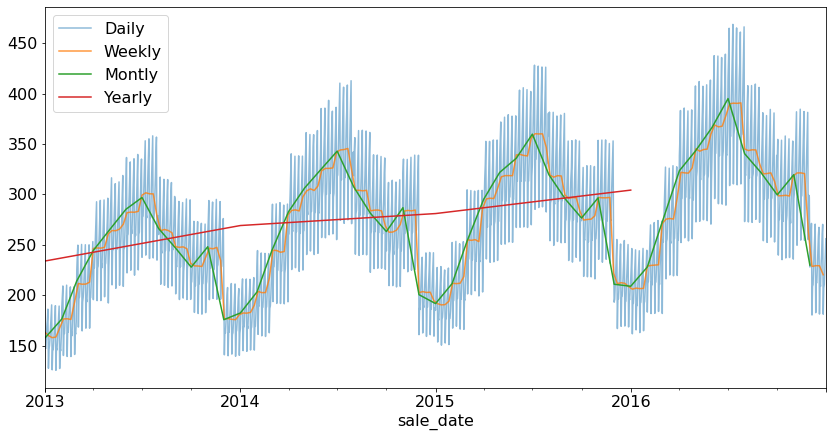

In [98]:
# vizualizing the daily, weekly, monthly, and yearly mean of total sales

ax = y.resample('D').sales_total.mean().plot(label = 'Daily', alpha = 0.5)
y.resample('W').mean().sales_total.plot(alpha=.8, label='Weekly', ax = ax)
y.resample('M').mean().sales_total.plot(label='Montly', ax = ax)
y.resample('Y').mean().sales_total.plot(label='Yearly', ax = ax)
plt.legend()

**Lets see the rolling average**

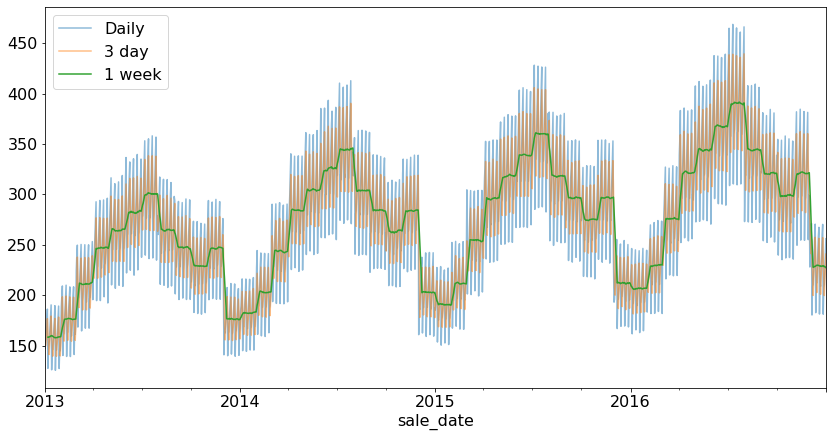

In [97]:
y.resample('D').sales_total.mean().plot(label = 'Daily', alpha = 0.5)
y.resample('D').sales_total.mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').sales_total.mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

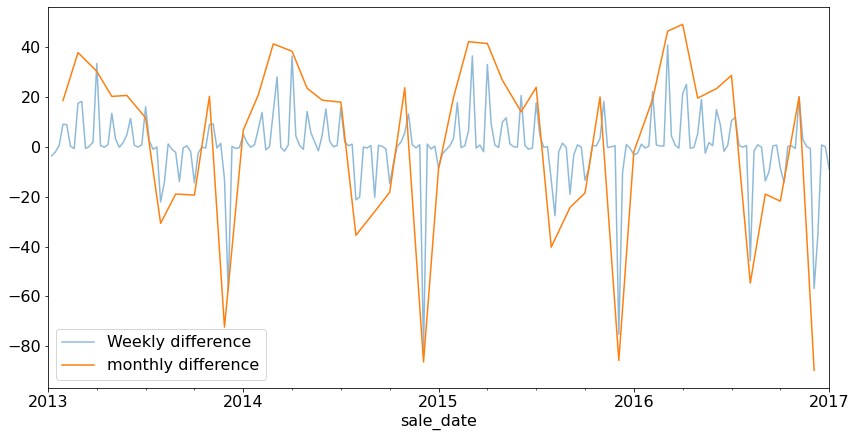

In [107]:
# vizualizing the change in total sales from one period of time to another

y.resample('W').sales_total.mean().diff().plot(alpha = 0.5, label = 'Weekly difference')
y.resample('M').sales_total.mean().diff().plot(label = 'monthly difference')
plt.legend()
plt.show()

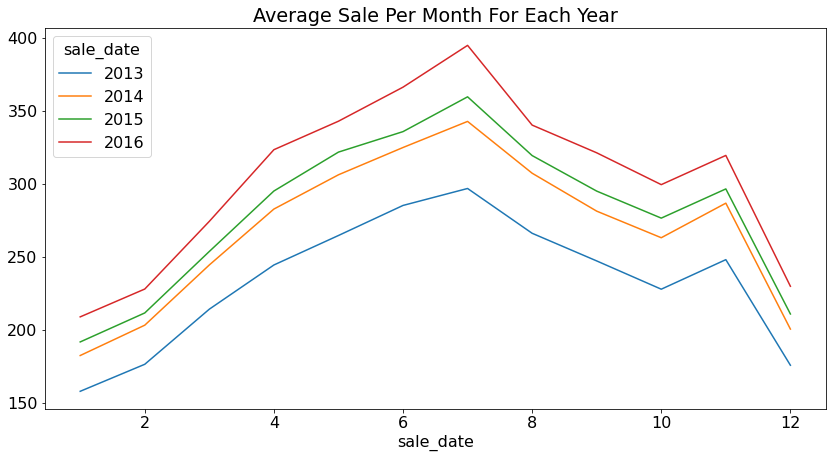

In [108]:
# Seasonal Plot

y.groupby([y.index.year, y.index.month]).sales_total.mean().unstack(0).plot(title = "Average Sale Per Month For Each Year")

plt.show()